# Assignment 1
Kyle Gallagher  |  MSDS422 - Fulton

# Analysis and Insights
## Data Prep
This analysis started with a download of the latest COVID-19 data on 3/29/2020 from the European Centre for Disease Control. After doing a few high level looks at the data I applied a few transfomations. I created new columns for cases per 100,000 people (based on the population) as well as created a column Deaths/Case which simply divides the one column by the other. These columns allow me to normalize for population as well as see which countries have the highest death rates.

I also did some scaling transmforations. I scaled Deaths and Cases both using a MinMax scaler and a Standard scaler from Scikit-learn's library. I created them as new variables and kept the original values.
## Results
I started off by looking at simply the number of cases and deaths over time. As expected they show an exponential growth over time. I wanted to then dig in by country to see who has the most cases. I used my cases/100,000 people calculated column to normalize the cases by the country's population. While this logically seems like it would be a better approach than not normalizing it turns out to not be great because we see mostly countries and territories with very small populations. 

That got me curious about which countries have the worst death rates (deaths/cases). Since the data is by day I attempted to just average my deaths/case column to get one number for each country. I manually tested China by summing the deaths and dividing by the sum of the cases and as you can see below the number is way off. Instead I was forced to run a FOR loop through the data and calculate it for each country. The results show that while many African countries may not have as many cases for the cases that they do have they're seeing higher death rates. This seems likely as healthcare in an African country likely isn't as advanced as in a Western or European country. However we do see Italy on the list as well which coincides with the anecdotal data I've been seeing in the news on the situation there. I knew Italy was struggling but it was shocking to see a first world, industrialized country like Italy with a +10% death rate. That was shocking. I was curious about where we are at here in the US and found out we're currently sitting around 1.7%, thankfully much lower than Italy.

Lastly I wanted to put that death rate number in context. I could see the top countries but where are most countries at? I created a histogram of the data and while there are some outlier countries with very large rates luckily it looks like most have a much lower <= 2.5% rate. The distribution is heavily right skewed. 

# Appendix - Code and Output

## Adding Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Importing Data

In [2]:
# Data source: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
df = pd.read_csv('./data', sep=',', engine='python')

## High Level Summary Statistics

In [3]:
# Getting a look at the first 5 rows
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,3/29/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
1,3/28/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
2,3/27/2020,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,3/26/2020,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
4,3/25/2020,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7515 entries, 0 to 7514
Data columns (total 10 columns):
dateRep                    7515 non-null object
day                        7515 non-null int64
month                      7515 non-null int64
year                       7515 non-null int64
cases                      7515 non-null int64
deaths                     7515 non-null int64
countriesAndTerritories    7515 non-null object
geoId                      7500 non-null object
countryterritoryCode       7448 non-null object
popData2018                7504 non-null float64
dtypes: float64(1), int64(5), object(4)
memory usage: 587.2+ KB


We see that there is some nulls in the geoID and countryterritory code variables. Also the date field is text, it will make things easier if we change it to a datetime.

In [5]:
# Changing dateRep to a date time for easier plotting
df['dateRep'] = pd.to_datetime(df['dateRep'])

In [6]:
# Getting summary statistics for all variables
df.describe(include = 'all')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
count,7515,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515,7500,7448,7.504000e+03
unique,90,NaN,NaN,NaN,NaN,NaN,196,195,194,NaN
top,2020-03-29 00:00:00,NaN,NaN,NaN,NaN,NaN,Spain,ES,NLD,NaN
freq,195,NaN,NaN,NaN,NaN,NaN,90,90,90,NaN
first,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-03-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17.143979,2.268929,2019.991084,87.443779,4.052029,NaN,NaN,NaN,7.046491e+07
std,NaN,8.439156,1.245780,0.094006,659.254504,38.319821,NaN,NaN,NaN,2.126148e+08
min,NaN,1.000000,1.000000,2019.000000,-9.000000,0.000000,NaN,NaN,NaN,1.000000e+03
25%,NaN,10.000000,1.000000,2020.000000,0.000000,0.000000,NaN,NaN,NaN,4.137309e+06


## Feature Creation and Transformation
Now that we have a feel for the original data lets create some new variables and scale some existing ones

In [7]:
# Creating new column: Cases per 100,000 people
df.loc[:,'cases/100000'] = df.loc[:,'cases']/(df.loc[:,'popData2018']/100000)

# Creating another column: Deaths as a percent of cases
df.loc[:,'deaths/case'] = df.loc[:,'deaths']/df.loc[:,'cases']

In [8]:
# Avoiding division by zero where cases == 0
df.loc[df.loc[:,'cases'] == 0, 'deaths/case'] = 0

In [9]:
# Creating new variables with Min Max Scaler on Deaths and Cases
# I couldn't figure out how to run the scalers for just one column that's why I'm doing it for two and using slicers
df.loc[:,'minmax_death'] = MinMaxScaler().fit_transform(df.loc[:, ['deaths', 'cases']])[:,0]
df.loc[:,'minmax_cases'] = MinMaxScaler().fit_transform(df.loc[:, ['deaths', 'cases']])[:,1]

In [10]:
# Creating new variables  with Standard Scaler on Deaths and Cases
df.loc[:,'standard_death'] = StandardScaler().fit_transform(df.loc[:, ['deaths', 'cases']])[:,0]
df.loc[:,'standard_cases'] = StandardScaler().fit_transform(df.loc[:, ['deaths', 'cases']])[:,1]

As expected we see that when we plot the values of 'Death' against the MinMax Scaled 'minmax_death' we get a straight line. The only difference is the scales of the axes. Previously values ranged from 0 to 1,000, now they're all between 0 and 1.

Standard scaler gives us the same result except the values aren't contained to the range (0,1).

Text(0,0.5,'Original')

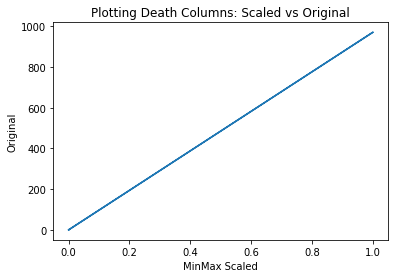

In [11]:
plt.plot(df.loc[:,'minmax_death'], df.loc[:,'deaths'])
plt.title('Plotting Death Columns: Scaled vs Original')
plt.xlabel('MinMax Scaled')
plt.ylabel('Original')

## Exploratory Graphs

We see that the trend for the number of deaths is near identical to the number of cases (although the number is much lower (notice the y axis units).

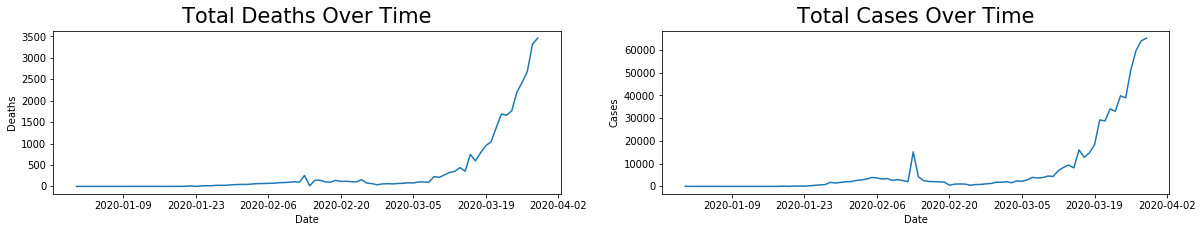

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,3))
axes[0].plot(df.groupby('dateRep')['deaths'].sum());
axes[1].plot(df.groupby('dateRep')['cases'].sum());

axes[0].set_title('Total Deaths Over Time', fontsize=21, y=1.01);
axes[0].set_ylabel('Deaths');
axes[0].set_xlabel('Date');

axes[1].set_title('Total Cases Over Time', fontsize=21, y=1.01);
axes[1].set_ylabel('Cases');
axes[1].set_xlabel('Date');

Top 10 Countries/Territories with most cases per 100,000 people:

<i> Surprisingly Spain is the only country I've seen mentioned in the news...</i>

In [13]:
df.groupby('countriesAndTerritories')['cases/100000'].sum().sort_values(ascending=False).head(10)

countriesAndTerritories
Cases_on_an_international_conveyance_Japan    23200.000000
San_Marino                                      663.016131
Holy_See                                        600.000000
Andorra                                         399.968834
Faroe_Islands                                   319.607398
Luxembourg                                      301.286102
Iceland                                         272.361656
Gibraltar                                       166.083398
Liechtenstein                                   160.907412
Spain                                           154.628003
Name: cases/100000, dtype: float64

Top 10 Countries/Territories with most average deaths/case:


In [14]:
df.groupby('countriesAndTerritories')['deaths/case'].mean().sort_values(ascending=False).head(10)

countriesAndTerritories
China                  0.121193
Guam                   0.090909
Albania                0.088187
Gambia                 0.083333
Trinidad_and_Tobago    0.078431
Ghana                  0.068750
Argentina              0.067522
Venezuela              0.066667
Guyana                 0.066667
San_Marino             0.066399
Name: deaths/case, dtype: float64

In [15]:
# Manually calculating value for China
sum(df.loc[df.loc[:,'countriesAndTerritories'] == 'China','deaths'])/sum(df.loc[df.loc[:,'countriesAndTerritories'] == 'China','cases'])

0.04014961987806952

As seen above the true rate calculated manually is 4% and averaging our column deaths/case gives us 12% so we can't get the true value just by averaging the deaths/case column.

Since we can't just take the mean of our column we have to sum each value and calculate it. Maybe there is a better way but my thoughts go to a FOR loop to accomplish this:

In [16]:
list = []
for country in df.loc[:,'countriesAndTerritories']:
    a = sum(df.loc[df.loc[:,'countriesAndTerritories'] == country,'deaths'])/sum(df.loc[df.loc[:,'countriesAndTerritories'] == country ,'cases'])
    list.append([country, a])

Now we can see the top 10 Countries/Territories by deaths/case. If you're going to get coronavirus it seems you'd not want to do it in one of these places:

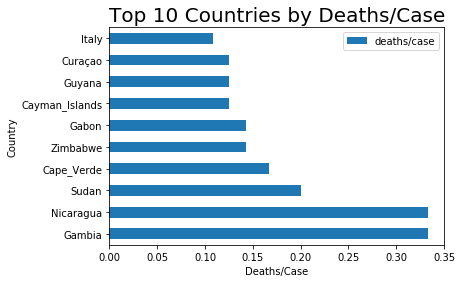

In [17]:
ax = pd.DataFrame(list, columns = ['Country', 'deaths/case']).drop_duplicates().sort_values(by = 'deaths/case', ascending=False).head(10).set_index('Country').plot(kind = 'barh')
ax.set_title('Top 10 Countries by Deaths/Case', fontsize = 20)
ax.set_ylabel('Country');
ax.set_xlabel('Deaths/Case');

It seems that while Africa doesn't have as many cases as other continents (given their population) for the cases that it does have people are dying at a much higher rate.

Also Italy while terrifying, makes sense. Still shocking to see that a first world country has a +10% death rate.

In [18]:
deaths_case = pd.DataFrame(list, columns = ['Country', 'deaths/case']).drop_duplicates()
deaths_case.loc[deaths_case.loc[:,'Country'] == 'United_States_of_America', :]

,Country,deaths/case
7269,United_States_of_America,0.017575


USA has a pretty low rate. Glad to see

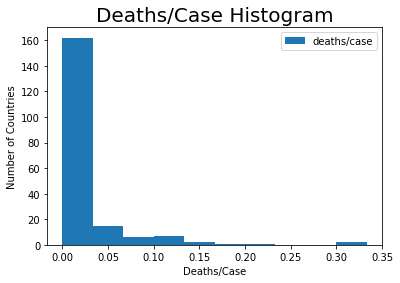

In [19]:
ax = deaths_case.plot(kind = 'hist')
ax.set_title('Deaths/Case Histogram', fontsize = 20)
ax.set_ylabel('Number of Countries');
ax.set_xlabel('Deaths/Case');

While there are a few outlier countries with really high death rates, most countries have death rates at or below 2.5%